In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal as ss

In [2]:
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, f1_score,
    matthews_corrcoef, roc_curve, auc
)
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [3]:
dataset = pd.read_csv('datasets/dataset.csv')

In [4]:
y = dataset["label"]
X = dataset.drop(columns=["label"])

In [5]:
def classify(model):
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    accuracies = []
    f1_scores = []
    mccs = []
    aucs = []

    plt.figure(figsize=(10, 8))

    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
        print(f"\n---- Fold {fold + 1} ----")
        
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
        
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_val)
        y_proba = model.predict_proba(X_val)[:, 1]

        acc = accuracy_score(y_val, y_pred)
        f1 = f1_score(y_val, y_pred)
        mcc = matthews_corrcoef(y_val, y_pred)
        fpr, tpr, _ = roc_curve(y_val, y_proba)
        roc_auc = auc(fpr, tpr)

        print(f"Accuracy: {acc:.4f}")
        print(f"F1 Score: {f1:.4f}")
        print(f"MCC: {mcc:.4f}")
        print(f"AUC: {roc_auc:.4f}")

        accuracies.append(acc)
        f1_scores.append(f1)
        mccs.append(mcc)
        aucs.append(roc_auc)

        # ROC curve plotting
        plt.plot(fpr, tpr, label=f'Fold {fold + 1} (AUC = {roc_auc:.2f})')

    # ROC plot
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve (5-fold CV)")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print(f"\nŚrednia Accuracy: {np.mean(accuracies):.4f}")
    print(f"Średnia F1 Score: {np.mean(f1_scores):.4f}")
    print(f"Średnia MCC: {np.mean(mccs):.4f}")
    print(f"Średnia AUC: {np.mean(aucs):.4f}")

In [6]:
model_xgboost = XGBClassifier(
                                n_estimators=100,
                                learning_rate=0.1,
                                max_depth=4,
                                eval_metric="logloss",
                                random_state=42
                            )

In [7]:
model_logreg = LogisticRegression(random_state=42)

In [8]:
model_RF = RandomForestClassifier(n_estimators=100, random_state=42)

In [9]:
model_SVM = SVC(kernel='rbf', random_state=42, probability=True)


---- Fold 1 ----
Accuracy: 0.8333
F1 Score: 0.8000
MCC: 0.7071
AUC: 0.9444

---- Fold 2 ----
Accuracy: 0.7500
F1 Score: 0.7692
MCC: 0.5071
AUC: 0.8889

---- Fold 3 ----
Accuracy: 0.5833
F1 Score: 0.6667
MCC: 0.1925
AUC: 0.7500

---- Fold 4 ----
Accuracy: 0.7500
F1 Score: 0.8000
MCC: 0.5774
AUC: 0.7500

---- Fold 5 ----
Accuracy: 0.5833
F1 Score: 0.2857
MCC: 0.3015
AUC: 0.7222


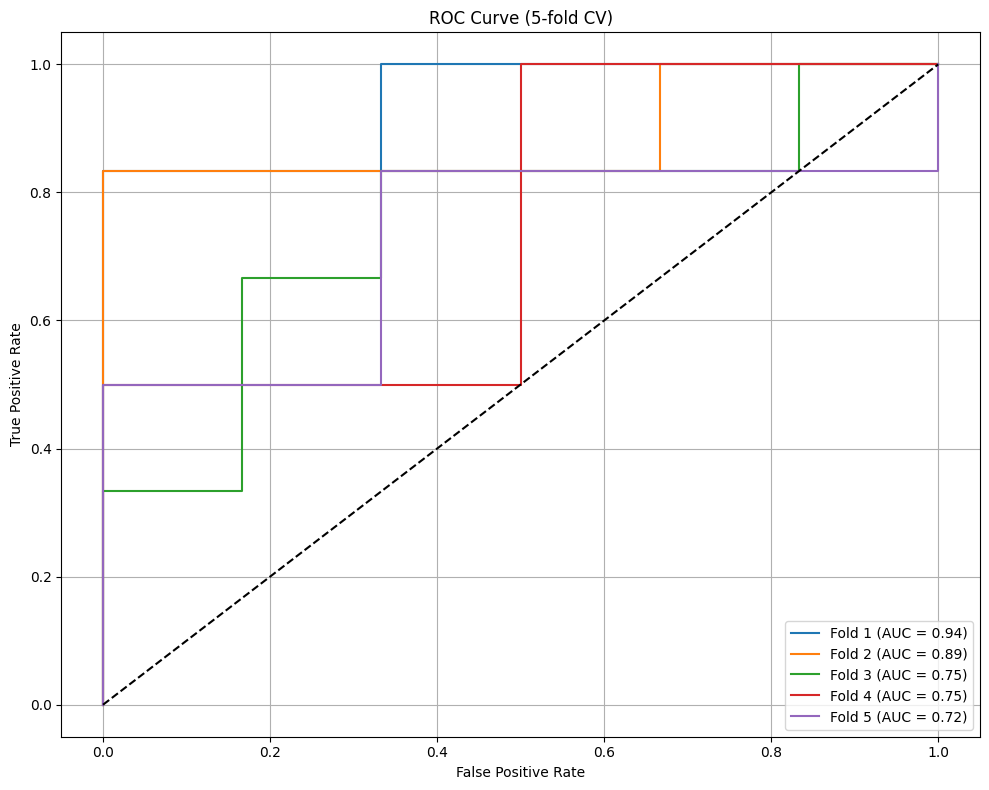


Średnia Accuracy: 0.7000
Średnia F1 Score: 0.6643
Średnia MCC: 0.4571
Średnia AUC: 0.8111


In [10]:
classify(model_xgboost)


---- Fold 1 ----
Accuracy: 0.6667
F1 Score: 0.7143
MCC: 0.3536
AUC: 0.8056

---- Fold 2 ----
Accuracy: 0.5833
F1 Score: 0.6154
MCC: 0.1690
AUC: 0.6389

---- Fold 3 ----
Accuracy: 0.3333
F1 Score: 0.3333
MCC: -0.3333
AUC: 0.5000

---- Fold 4 ----
Accuracy: 0.5000
F1 Score: 0.5000
MCC: 0.0000
AUC: 0.7500

---- Fold 5 ----
Accuracy: 0.6667
F1 Score: 0.6667
MCC: 0.3333
AUC: 0.8056


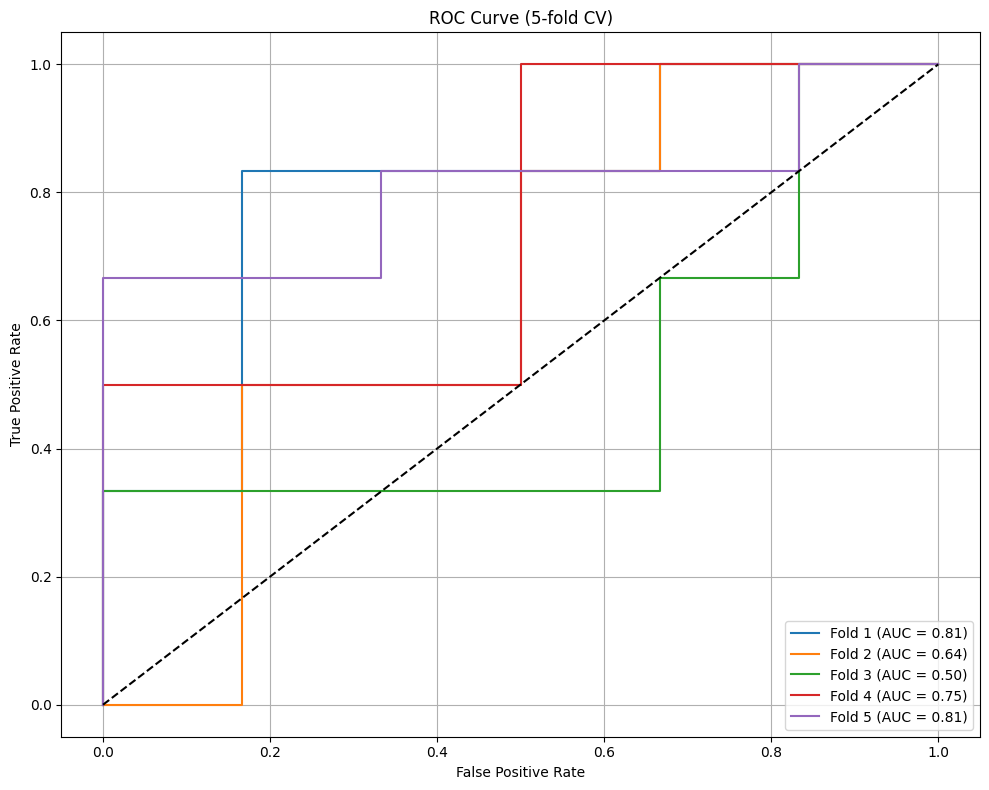


Średnia Accuracy: 0.5500
Średnia F1 Score: 0.5659
Średnia MCC: 0.1045
Średnia AUC: 0.7000


In [11]:
classify(model_logreg)


---- Fold 1 ----
Accuracy: 0.8333
F1 Score: 0.8333
MCC: 0.6667
AUC: 0.9444

---- Fold 2 ----
Accuracy: 0.7500
F1 Score: 0.7692
MCC: 0.5071
AUC: 0.8889

---- Fold 3 ----
Accuracy: 0.4167
F1 Score: 0.5333
MCC: -0.1925
AUC: 0.3889

---- Fold 4 ----
Accuracy: 0.7500
F1 Score: 0.7273
MCC: 0.5071
AUC: 0.8472

---- Fold 5 ----
Accuracy: 0.6667
F1 Score: 0.6667
MCC: 0.3333
AUC: 0.6111


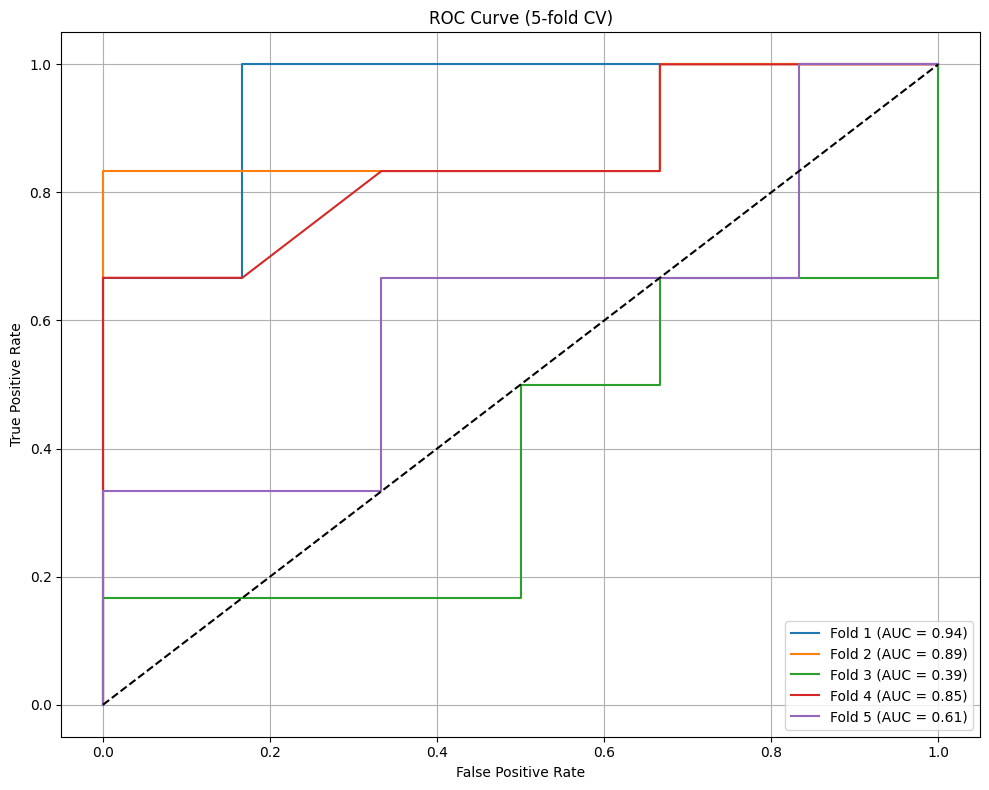


Średnia Accuracy: 0.6833
Średnia F1 Score: 0.7060
Średnia MCC: 0.3643
Średnia AUC: 0.7361


In [12]:
classify(model_RF)


---- Fold 1 ----
Accuracy: 0.6667
F1 Score: 0.7500
MCC: 0.4472
AUC: 0.0556

---- Fold 2 ----
Accuracy: 0.6667
F1 Score: 0.6667
MCC: 0.3333
AUC: 0.2222

---- Fold 3 ----
Accuracy: 0.4167
F1 Score: 0.5882
MCC: -0.3015
AUC: 0.3611

---- Fold 4 ----
Accuracy: 0.5000
F1 Score: 0.6250
MCC: 0.0000
AUC: 0.5833

---- Fold 5 ----
Accuracy: 0.5000
F1 Score: 0.5714
MCC: 0.0000
AUC: 0.5833


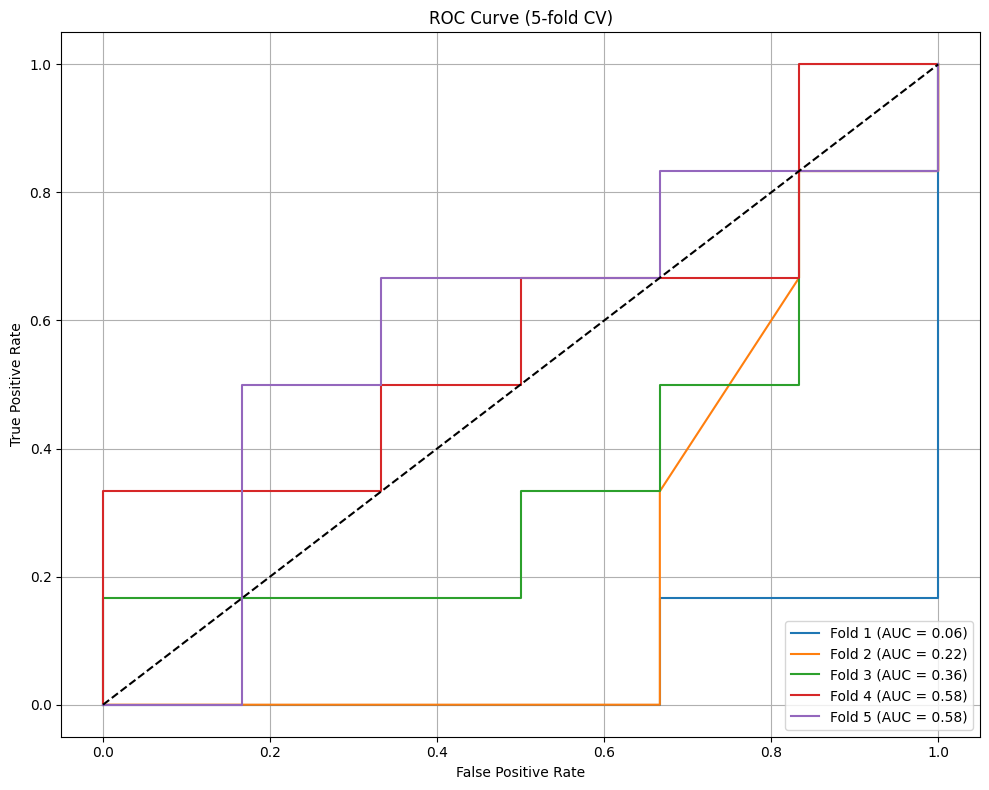


Średnia Accuracy: 0.5500
Średnia F1 Score: 0.6403
Średnia MCC: 0.0958
Średnia AUC: 0.3611


In [13]:
classify(model_SVM)